<center><h1>Making Merger Tree from m3p output</h1></center>

In [1]:
import numpy as np
from m3p_merger import m3p_merger
import matplotlib.pyplot as plt

import sys

sys.path.insert(0,r'..')
from utils import ParamsFile, HaloReader


### Define m3p data path

This directory should contain a folder of m3p input files called 'inputs' and a folder of m3p output files called 'axOut'.

We also define here the m3p inputs file for while we want to build our merger tree.

In [2]:
m3p_data_path = r"C:\Users\david\AxionData\PeakPatch\m3p_merger"

ppFile = "inputs.ax_jan5_stitched"

### Make list of all peaks
MakePeakList returns 1D array of length equal to the number of redshift outputs and the comoving boxsize. Each element of the array is an additional array of all of the peak properties in *Lagrangian* (unperturbed) coordinates for a given redshift output.

Each of these nested arrays stores the (x, y, z) coordinates [cMpc], radius [cMpc] and mass [Msol] of each peak. It therefore has a (5, N) shape where N is the number of peaks at this snapshot. 

For example: `peak_list[10][:,145]` will return the properties (x, y, z, radius, mass) for the 145th halo in the 10th redshift snapshot.

In [3]:
p = ParamsFile(m3p_data_path + "\inputs/" + ppFile)
redshifts = p["redshifts"] 

peak_list, boxsize = m3p_merger.MakePeakList(ppFile, printOutput = True)

	Loading file (100 of 100): C:\Users\David\AxionData/PeakPatch/m3p_merger/axOut/jan5/jan5_stitched_final_halos_99.hdf5


## Num halo check

We see that, as expected, the number of halos begins very small then rises as linearly evolved overdensities grow and the collapse threshold falls. The number of halos peaks at around matter-radiation equality and then falls again as these halos merge together into a smaller number of larger final halos.

Text(0, 0.5, 'Number of halos')

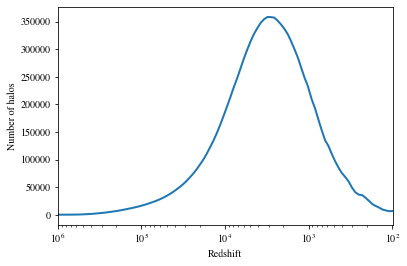

In [4]:
# Calculate number of peaks at each redshift
numHalos = [len(peak_list[i][0]) for i in range(len(peak_list))]

plt.semilogx(redshifts, numHalos, lw = 2)
plt.xlim([max(redshifts), min(redshifts)])
plt.xlabel("Redshift")
plt.ylabel("Number of halos")

### Total mass check

We could similarly choose to look at the total mass of collapsed objects in our box


Text(0, 0.5, 'Total Mass [$M_{\\odot}$]')

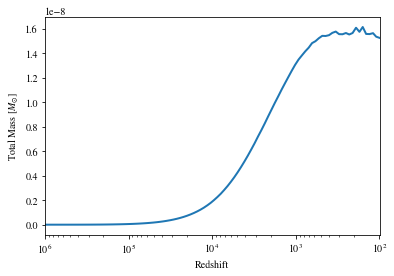

In [5]:
totalMass = [sum(peak_list[i][4,:]) for i in range(len(peak_list))]
plt.semilogx(redshifts, totalMass, lw = 2)
plt.xlim([max(redshifts), min(redshifts)])
plt.xlabel("Redshift")
plt.ylabel("Total Mass [$M_{\odot}$]")

In [6]:
out = m3p_merger.BuildMergerTree2(peak_list, ppFile, final_halos_indicies = 5457)

<h2><center>Plot all peaks on each other</center></h2>

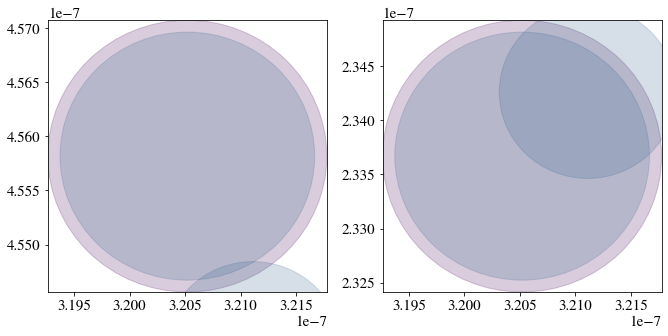

In [7]:
m3p_merger.plotMergerPatches(out[0], ppFile, cmap = "viridis")

<h2><center>Plot merger tree</center></h2>

In [8]:
fig = m3p_merger.plotMergerTree(out[0], ppFile, font_size = 16, log = True,
                              colorbar=True, colorbar_title = "Mass [$M_{\odot}$]", cmap = "plasma_r")
plt.show()
#np.save("./FinalGraphs/Data/MergerTreeExample.npy",out2)

Max mass: 7.92e-16 Msol


TypeError: You must first set_array for mappable

<h3>Checking Progenitor mass calculation</h3>

In [ ]:
importlib.reload(m3p_merger)
ppFile = "inputs.ax_stitched"

halo_index = 2

f = 0.01

peak_list_main, boxsize = m3p_merger.MakePeakList(ppFile,startIndex = 0, massType = "unstripped")
out = m3p_merger.BuildMergerTree2(peak_list_main, ppFile, final_halos_indicies = halo_index)
zCol, ProgMass, z = m3p_merger.FindCollapseRedshift(out[0], f, ppFile,startIndex = 0, interp = "None")
plt.semilogx(z, ProgMass, 'r.', ms=6, label ="method 2")

plt.legend(loc=2)
plt.xlim(max(z), min(z))
plt.ylabel("Prog Mass [$M_{\odot}$]")
plt.xlabel("Redshift, $z$")

#np.save("./FinalGraphs/Data/MassGrowth.npy", [z, ProgMass, zCol])

In [ ]:
peak_list_main[0][:,0]